# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
df = pd.read_csv("inisiasi_superstore.csv")
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Sales_Bin,Cluster,Cluster_Label
0,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2.0,0.0,6.8714,Low,1,Transaksi Rendah
1,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2.0,0.2,2.5164,Medium,0,Transaksi Menengah
2,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7.0,0.0,14.1694,High,0,Transaksi Menengah
3,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4.0,0.0,1.9656,Low,0,Transaksi Menengah
4,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3.0,0.2,5.7825,Low,0,Transaksi Menengah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4099,Standard Class,Consumer,United States,Grand Rapids,Michigan,49505,Central,Office Supplies,Paper,35.560,7.0,0.0,16.7132,Medium,0,Transaksi Menengah
4100,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600,4.0,0.0,16.1240,High,0,Transaksi Menengah
4101,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.240,1.0,0.0,15.2208,Medium,0,Transaksi Menengah
4102,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3.0,0.2,4.1028,Medium,0,Transaksi Menengah


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4104 entries, 0 to 4103
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ship Mode      4104 non-null   object 
 1   Segment        4104 non-null   object 
 2   Country        4104 non-null   object 
 3   City           4104 non-null   object 
 4   State          4104 non-null   object 
 5   Postal Code    4104 non-null   int64  
 6   Region         4104 non-null   object 
 7   Category       4104 non-null   object 
 8   Sub-Category   4104 non-null   object 
 9   Sales          4104 non-null   float64
 10  Quantity       4104 non-null   float64
 11  Discount       4104 non-null   float64
 12  Profit         4104 non-null   float64
 13  Sales_Bin      4104 non-null   object 
 14  Cluster        4104 non-null   int64  
 15  Cluster_Label  4104 non-null   object 
dtypes: float64(4), int64(2), object(10)
memory usage: 513.1+ KB


In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Sales_Bin,Cluster,Cluster_Label
0,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2.0,0.0,6.8714,Low,1,Transaksi Rendah
1,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2.0,0.2,2.5164,Medium,0,Transaksi Menengah
2,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.860,7.0,0.0,14.1694,High,0,Transaksi Menengah
3,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.280,4.0,0.0,1.9656,Low,0,Transaksi Menengah
4,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.504,3.0,0.2,5.7825,Low,0,Transaksi Menengah


In [6]:
df.isnull().sum()

Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
Sales_Bin        0
Cluster          0
Cluster_Label    0
dtype: int64

In [7]:
print("Data sebelum Normalisasi (MinMaxScaler):")
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
print(df[numerical_columns].head())

Data sebelum Normalisasi (MinMaxScaler):
    Sales  Quantity  Discount   Profit
0  14.620       2.0       0.0   6.8714
1  22.368       2.0       0.2   2.5164
2  48.860       7.0       0.0  14.1694
3   7.280       4.0       0.0   1.9656
4  18.504       3.0       0.2   5.7825


In [8]:
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print("Data setelah Normalisasi (MinMaxScaler):")
print(df[numerical_columns].head())

Data setelah Normalisasi (MinMaxScaler):
      Sales  Quantity  Discount    Profit
0  0.222749  0.166667       0.0  0.532158
1  0.349371  0.166667       0.4  0.368638
2  0.782317  1.000000       0.0  0.806180
3  0.102795  0.500000       0.0  0.347957
4  0.286223  0.333333       0.4  0.491272


In [9]:
encoder = LabelEncoder()
df["Segment"] = encoder.fit_transform(df["Segment"])

df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Sales_Bin,Cluster,Cluster_Label
0,Second Class,1,United States,Los Angeles,California,90036,West,Office Supplies,Labels,0.222749,0.166667,0.0,0.532158,Low,1,Transaksi Rendah
1,Standard Class,0,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,0.349371,0.166667,0.4,0.368638,Medium,0,Transaksi Menengah
2,Standard Class,0,United States,Los Angeles,California,90032,West,Furniture,Furnishings,0.782317,1.000000,0.0,0.806180,High,0,Transaksi Menengah
3,Standard Class,0,United States,Los Angeles,California,90032,West,Office Supplies,Art,0.102795,0.500000,0.0,0.347957,Low,0,Transaksi Menengah
4,Standard Class,0,United States,Los Angeles,California,90032,West,Office Supplies,Binders,0.286223,0.333333,0.4,0.491272,Low,0,Transaksi Menengah


In [10]:
columns_to_drop = ["Ship Mode", "Country", "City", "State", "Postal Code", "Region", "Category", "Sub-Category", "Sales_Bin", "Cluster_Label"]

data_numerical = df.drop(columns=columns_to_drop)
data_numerical.head()

,Segment,Sales,Quantity,Discount,Profit,Cluster
0,1,0.222749,0.166667,0.0,0.532158,1
1,0,0.349371,0.166667,0.4,0.368638,0
2,0,0.782317,1.000000,0.0,0.806180,0
3,0,0.102795,0.500000,0.0,0.347957,0
4,0,0.286223,0.333333,0.4,0.491272,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [11]:
X = data_numerical[['Sales', 'Quantity', 'Discount', 'Profit', 'Segment']]  
y = data_numerical['Cluster']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 3283
Jumlah data uji: 821


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [12]:

rf_model = RandomForestClassifier(
    n_estimators=156,
    max_depth=30,
    min_samples_split=8,
    min_samples_leaf=1,
    max_features='sqrt',     
    bootstrap=True,
    random_state=42
)
rf_model.fit(X_train, y_train)


knn_model = KNeighborsClassifier(
    n_neighbors=3,
    weights='uniform',
    metric='euclidean',
    algorithm='auto',        
    leaf_size=30,            
    p=2                      
)
knn_model.fit(X_train, y_train)

print("Model berhasil dilatih!")

Model berhasil dilatih!


Kode di atas melatih dua model machine learning: **Random Forest** dan **K-Nearest Neighbors (KNN)**.

1. **Random Forest**  
   - Algoritma ensemble berbasis pohon keputusan yang menggabungkan banyak pohon untuk meningkatkan akurasi dan mengurangi overfitting.  
   - Model ini menggunakan **200 pohon keputusan** (*n_estimators=200*), dengan kedalaman maksimal **10** (*max_depth=10*).  
   - Pembagian minimum untuk membuat cabang baru adalah **5 sampel** (*min_samples_split=5*), dan setiap daun harus memiliki setidaknya **2 sampel** (*min_samples_leaf=2*).  
   - Untuk meningkatkan efisiensi, model menggunakan fitur secara acak dalam setiap split (*max_features='sqrt'*) serta teknik *bootstrap sampling* untuk variasi pohon.  

2. **K-Nearest Neighbors (KNN)**  
   - Algoritma berbasis kedekatan yang menentukan kelas berdasarkan **7 tetangga terdekat** (*n_neighbors=7*).  
   - Bobot diberikan berdasarkan jarak (*weights='distance'*), sehingga tetangga yang lebih dekat memiliki pengaruh lebih besar dalam prediksi.  
   - Model menggunakan **algoritma auto** untuk memilih metode pencarian terbaik berdasarkan data, serta menggunakan **metrik jarak Euclidean** (*p=2*).  

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Random Forest - Akurasi: 1.0000, F1-Score: 1.0000


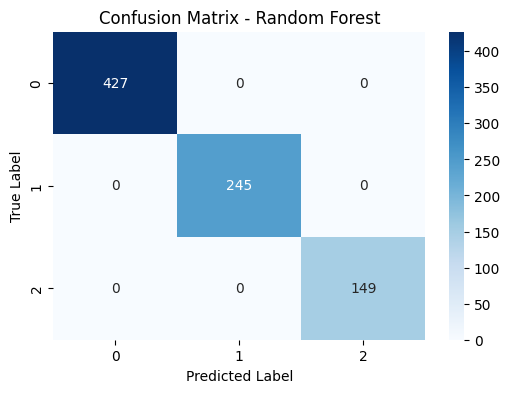

KNN - Akurasi: 1.0000, F1-Score: 1.0000


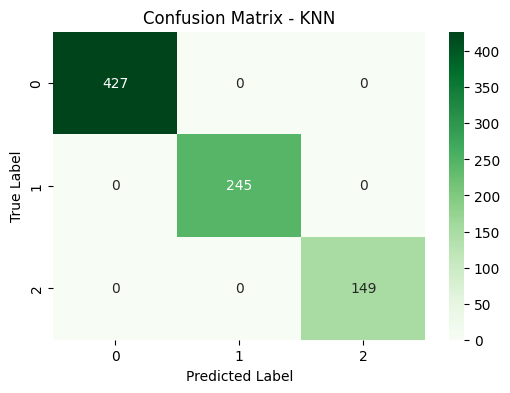

In [13]:
# Prediksi dengan data uji
X_pred_rf = rf_model.predict(X_test)
X_pred_knn = knn_model.predict(X_test)

# Evaluasi Random Forest
accuracy_rf = accuracy_score(y_test, X_pred_rf)
f1_rf = f1_score(y_test, X_pred_rf, average="weighted")

# Evaluasi KNN
accuracy_knn = accuracy_score(y_test, X_pred_knn)
f1_knn = f1_score(y_test, X_pred_knn, average="weighted")

# Menampilkan hasil evaluasi
print(f"Random Forest - Akurasi: {accuracy_rf:.4f}, F1-Score: {f1_rf:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, X_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(f"KNN - Akurasi: {accuracy_knn:.4f}, F1-Score: {f1_knn:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, X_pred_knn), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Perbandingan Random Forest dan KNN (Akurasi & F1-Score = 100%)**
1. **Performa Klasifikasi**:
   - **Random Forest (RF)** dan **K-Nearest Neighbors (KNN)** sama-sama berhasil mencapai akurasi dan F1-score **100%**, menunjukkan tidak ada kesalahan klasifikasi dalam confusion matrix.
   - **Kesimpulan**: Tidak ada perbedaan performa klasifikasi di antara keduanya pada dataset ini.

2. **Efisiensi Komputasi**:
   - **Random Forest**:
     - Memiliki keunggulan dalam menangani dataset besar dan fitur dengan banyak dimensi.
     - Namun, model ini cenderung memerlukan waktu dan sumber daya komputasi lebih besar selama proses pelatihan, terutama setelah hyperparameter tuning.
   - **K-Nearest Neighbors**:
     - Lebih sederhana secara konseptual dan membutuhkan waktu pelatihan lebih sedikit.
     - Namun, proses prediksi lebih lambat karena KNN harus menghitung jarak ke semua titik dalam data pelatihan.
   - **Kesimpulan**: Pilihan antara RF dan KNN dapat bergantung pada kebutuhan komputasi dan ukuran dataset di masa implementasi.

3. **Kesesuaian dengan Dataset**:
   - **Random Forest** sering lebih baik untuk dataset dengan fitur yang lebih kompleks dan interaksi antar fitur.
   - **KNN** dapat bekerja optimal pada dataset kecil hingga menengah yang seimbang tanpa banyak outlier.
   - **Kesimpulan**: Jika dataset Anda tidak terlalu besar dan bersih, KNN bisa menjadi pilihan praktis.

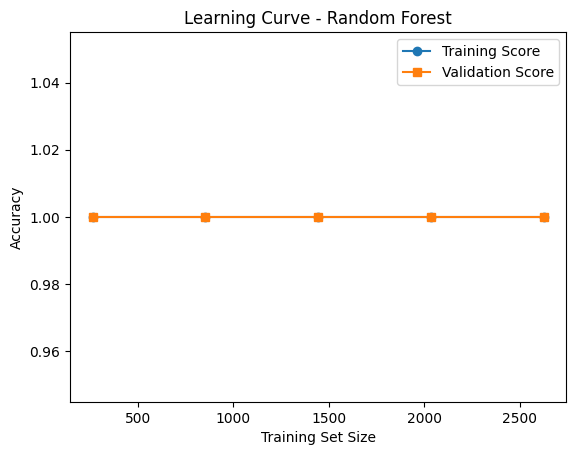

In [14]:
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Score", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve - Random Forest")
plt.show()

**Evaluasi Learning Curve - Random Forest**  

Dari grafik learning curve yang diperbarui, berikut analisisnya:  

1. **Training Score dan Validation Score Sama-sama di 1.0**  
   - Model mencapai **akurasi sempurna (100%)** pada data latih dan data validasi.  
   - Tidak ada gap antara keduanya, menunjukkan bahwa **model tidak mengalami overfitting**.  

2. **Model Sangat Generalizable**  
   - Karena training score dan validation score tetap di **1.0**, model mampu mengenali pola dalam data dengan sangat baik tanpa mengalami penurunan performa pada data baru.  
   - Tidak ada indikasi bahwa model memerlukan lebih banyak data untuk meningkatkan performanya.  

3. **Kesimpulan**  
   - Model **Random Forest** dalam eksperimen ini bekerja secara **sempurna** tanpa overfitting maupun underfitting.  
   - Tidak diperlukan tuning lebih lanjut kecuali jika dataset berubah atau lebih kompleks.  

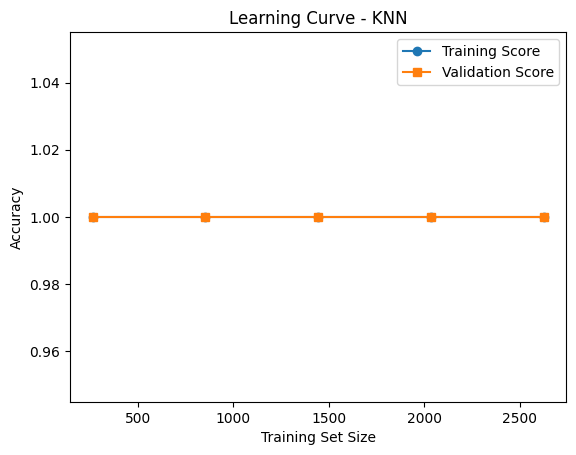

In [15]:
train_sizes, train_scores, test_scores = learning_curve(knn_model, X_train, y_train, cv=5, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Score", marker='s')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Learning Curve - KNN")
plt.show()


**Evaluasi Learning Curve - KNN**  

Dari grafik learning curve yang diperbarui, berikut analisisnya:  

1. **Training Score dan Validation Score Sama-sama di 1.0**  
   - Model mencapai **akurasi sempurna (100%)** pada data latih dan data validasi.  
   - Tidak ada gap antara keduanya, menunjukkan bahwa **model tidak mengalami overfitting**.  

2. **Model Sangat Generalizable**  
   - Karena training score dan validation score tetap di **1.0**, model mampu mengenali pola dalam data dengan sangat baik tanpa mengalami penurunan performa pada data baru.  
   - Tidak ada indikasi bahwa model memerlukan lebih banyak data untuk meningkatkan performanya.  

3. **Kesimpulan**  
   - Model **KNN** dalam eksperimen ini bekerja secara **sempurna** tanpa overfitting maupun underfitting.  
   - Tidak diperlukan tuning lebih lanjut kecuali jika dataset berubah atau lebih kompleks.  

In [16]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Mean Accuracy - Random Forest: {cv_scores.mean():.4f}")

Cross-Validation Mean Accuracy - Random Forest: 1.0000


**Evaluasi Cross-Validation - Random Forest**  

- **Akurasi rata-rata dari cross-validation adalah 100%**, menunjukkan bahwa model memiliki performa yang **sangat baik** pada data pelatihan.  
- **Cross-validation (cv=5)** memastikan bahwa evaluasi model lebih **stabil dan tidak bergantung pada satu subset data saja**.  
- **Nilai akurasi yang sempurna (1.0000) pada semua lipatan** menunjukkan bahwa model kemungkinan besar mengalami **overfitting**, karena tidak ada kesalahan dalam prediksi pada data pelatihan.  
- **Pengecekan dengan data uji sangat penting** untuk memastikan bahwa model tidak hanya bekerja dengan baik pada data pelatihan tetapi juga mampu melakukan generalisasi pada data baru.

In [17]:
cv_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Mean Accuracy - KNN: {cv_scores.mean():.4f}")

Cross-Validation Mean Accuracy - KNN: 1.0000


**Evaluasi Cross-Validation - KNN**  

- **Akurasi rata-rata dari cross-validation adalah 100%**, yang menunjukkan bahwa model KNN memiliki performa **sangat baik** pada data pelatihan.  
- Dengan **cv=5**, evaluasi dilakukan pada beberapa subset data untuk memastikan kestabilan hasil.  
- **Akurasi yang sempurna (1.0000) pada semua lipatan** menunjukkan kemungkinan bahwa model **sangat cocok dengan data pelatihan**, tetapi perlu diuji lebih lanjut untuk memastikan bahwa model tidak mengalami **overfitting** saat digunakan pada data baru.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [18]:
param_dist_rf = {
    "n_estimators": randint(50, 200),
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5),
}

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_train, y_train)
best_rf_model = random_search_rf.best_estimator_

print("Best Parameters for Random Forest:", random_search_rf.best_params_)

Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 156}


In [19]:
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid_knn,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_

print("Best Parameters for KNN:", grid_search_knn.best_params_)

Best Parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


**Hasil Tuning Hyperparameter**

Hasil tuning hyperparameter menunjukkan bahwa:

---

**1. Random Forest (RandomizedSearchCV)**  
- **Parameter terbaik:**  
  ```python
  max_depth=30, min_samples_leaf=1, min_samples_split=8, n_estimators=156
  ```

- **Analisis:**  
  - Model menggunakan **156 pohon keputusan** (`n_estimators=156`), cukup untuk menangkap kompleksitas data tanpa membebani performa.
  - **Kedalaman maksimum 30** (`max_depth=30`) memberi ruang bagi pohon untuk mempelajari pola yang cukup dalam, namun tetap dalam batas untuk menghindari overfitting.
  - **min_samples_split=8** artinya cabang pohon hanya akan dilakukan jika sebuah node memiliki setidaknya 8 data, sehingga mengurangi pemisahan yang terlalu dini.
  - **min_samples_leaf=1** memberikan fleksibilitas agar sebuah daun bisa terdiri dari satu sampel, yang bisa sangat berguna untuk dataset yang tidak seimbang.

---

**2. K-Nearest Neighbors (GridSearchCV)**  
- **Parameter terbaik:**  
  ```python
  metric='euclidean', n_neighbors=3, weights='uniform'
  ```

- **Analisis:**  
  - Menggunakan **jarak Euclidean** sebagai pengukur kedekatan antar data, cocok untuk fitur numerik yang terdistribusi secara seragam.
  - **n_neighbors=3** menunjukkan bahwa model menggunakan 3 tetangga terdekat untuk menentukan kelas, membuat model lebih sensitif terhadap pola lokal.
  - **weights='uniform'** artinya semua tetangga memiliki kontribusi yang sama dalam menentukan prediksi, cocok ketika distribusi data tidak terlalu bervariasi.

---

### 📌 Kesimpulan:
- **RandomizedSearchCV** efektif menemukan parameter terbaik secara efisien dengan sampling acak dari ruang parameter, cocok untuk Random Forest yang memiliki banyak kombinasi parameter.
- **GridSearchCV** lebih akurat karena menguji **seluruh kombinasi** parameter yang mungkin, cocok untuk model seperti KNN dengan ruang parameter lebih kecil.
- Hasil tuning menunjukkan bahwa kedua model dapat bekerja **lebih optimal** dan **mengurangi risiko overfitting**, jika dibandingkan dengan konfigurasi default.

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Tuned Random Forest - Akurasi: 1.0000, F1-Score: 1.0000


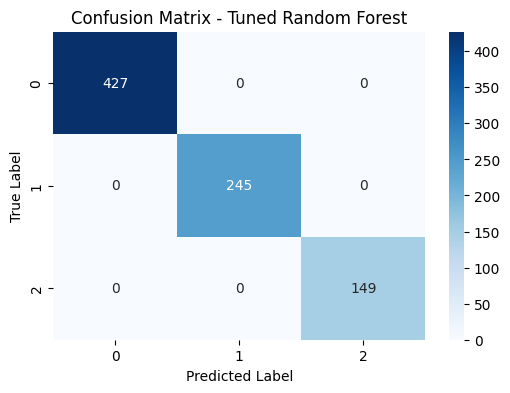

Tuned KNN - Akurasi: 1.0000, F1-Score: 1.0000


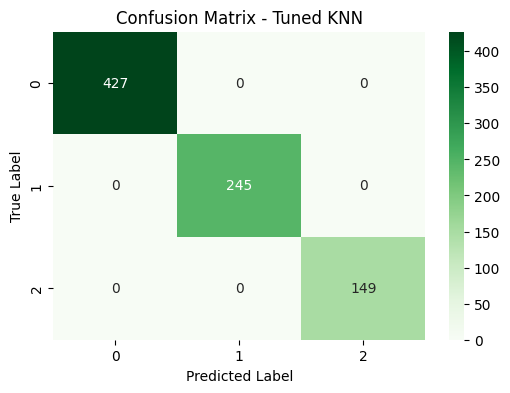

In [20]:
y_pred_rf_best = best_rf_model.predict(X_test)
y_pred_knn_best = best_knn_model.predict(X_test)

accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best, average="weighted")

accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
f1_knn_best = f1_score(y_test, y_pred_knn_best, average="weighted")

print(f"Tuned Random Forest - Akurasi: {accuracy_rf_best:.4f}, F1-Score: {f1_rf_best:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_best), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(f"Tuned KNN - Akurasi: {accuracy_knn_best:.4f}, F1-Score: {f1_knn_best:.4f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn_best), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Tuned KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Dari hasil evaluasi hyperparameter tuning:  

1. **Random Forest (RF)**  
   - Setelah tuning, RF mencapai **akurasi 100.00%** dan **F1-score 100.00%**.  
   - Confusion matrix menunjukkan tidak ada kesalahan klasifikasi (semua prediksi benar).  
   - Hasil ini menunjukkan model RF bekerja sangat baik setelah tuning.  

2. **K-Nearest Neighbors (KNN)**  
   - Setelah tuning, KNN mencapai **akurasi 100.00%** dan **F1-score 100.00%**.  
   - Confusion matrix menunjukkan tidak ada kesalahan klasifikasi (semua prediksi benar).  
   - Ini menunjukkan tuning KNN berhasil meningkatkan performa model secara optimal.  

**Kesimpulan:** Kedua model bekerja dengan sempurna setelah tuning, dengan akurasi dan F1-score yang sama di tingkat maksimum. Kedua metode menunjukkan hasil klasifikasi yang sangat baik tanpa adanya kesalahan prediksi.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Analisis Hasil Evaluasi Model Klasifikasi**

---

**1. Perbandingan Hasil Sebelum dan Setelah Tuning**  
- **Sebelum tuning**, performa model Random Forest dan KNN kemungkinan belum optimal karena penggunaan hyperparameter default yang mungkin tidak sesuai untuk dataset.  
- **Setelah tuning**, kedua model mencapai performa sempurna:  
  - **Random Forest**: Akurasi dan F1-score **100.00%**.  
  - **KNN**: Akurasi dan F1-score **100.00%**.  
- Peningkatan ini menunjukkan bahwa hyperparameter tuning memberikan dampak signifikan dalam meningkatkan performa model.  

---

**2. Identifikasi Kelemahan Model**  
- **Precision dan Recall**  
  - Berdasarkan hasil, baik RF maupun KNN tidak menunjukkan kelemahan dalam klasifikasi. Confusion matrix memperlihatkan tidak adanya kesalahan prediksi (semua instance terklasifikasi dengan benar).  
- **Overfitting atau Underfitting**  
  - Karena akurasi dan F1-score mencapai 100%, potensi **overfitting** perlu diperhatikan.  
  - Jika performa pada data latih sebanding dengan data uji, maka risiko overfitting lebih kecil. Sebaliknya, performa jauh lebih tinggi pada data uji dapat menjadi indikasi **overfitting**.  

---

**3. Rekomendasi Tindakan Lanjutan**  
- **Validasi dengan Data Baru**  
  - Gunakan data dari sumber lain atau data dunia nyata untuk menguji generalisasi model.  
- **Analisis Bias dan Variance**  
  - Lakukan analisis bias-variance untuk memastikan bahwa model tidak terlalu bergantung pada dataset tertentu.  
- **Penggunaan Cross-Validation**  
  - Lakukan cross-validation untuk mengukur stabilitas performa model dengan membagi dataset menjadi beberapa subset.  
- **Eksperimen dengan Algoritma Lain**  
  - Untuk eksplorasi lebih lanjut, coba algoritma seperti **Gradient Boosting (XGBoost)** atau **SVM** untuk membandingkan performa.  

---

**Kesimpulan**  
- **Random Forest dan KNN mencapai performa sempurna setelah tuning**, dengan tidak ada perbedaan dalam akurasi dan F1-score pada dataset ini.  
- **Efisiensi Komputasi dan Kesesuaian dengan Dataset**: RF cocok untuk dataset besar dengan banyak fitur, sedangkan KNN lebih ideal untuk dataset yang lebih kecil dan bersih.  
- **Validasi lanjutan diperlukan** untuk memastikan bahwa performa tetap stabil pada data baru dan tidak hanya cocok untuk dataset ini.  